In [1]:
import pandas as pd
import numpy as np
import csv as csv
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_dataset = pd.read_csv('train.csv')
print(train_dataset.shape)

(891, 12)


In [3]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)

(418, 11)


In [4]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_dataset.nunique(axis=0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
def bar_chart(feature):
    survived = train_dataset[train_dataset['Survived']==1][feature].value_counts()
    dead = train_dataset[train_dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

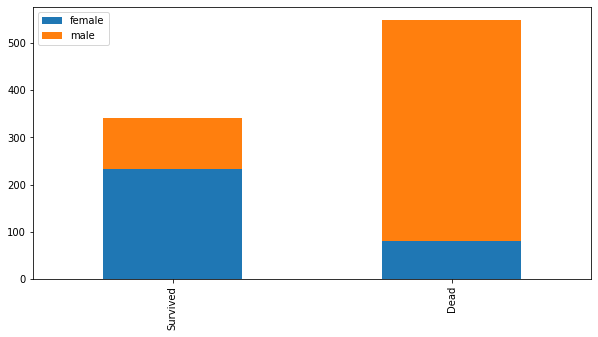

In [8]:
bar_chart('Sex')
# Females survived more than males. More males died than female.

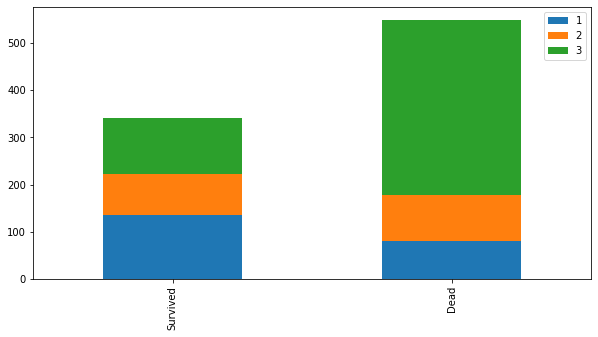

In [9]:
bar_chart('Pclass')
# More number of Class-1 passengers survived. More numbers of Class-3 passengers died.

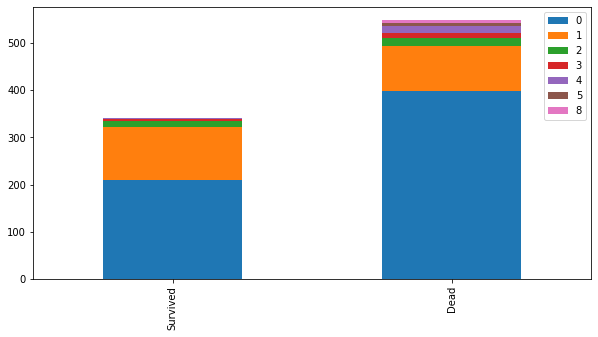

In [10]:
bar_chart('SibSp')
# People with no sibling or spouse have more survival rate.

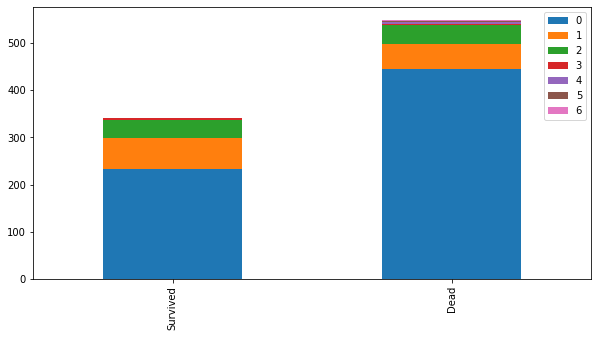

In [11]:
bar_chart('Parch')
# People travelling w/o parents or children have more survival rate.

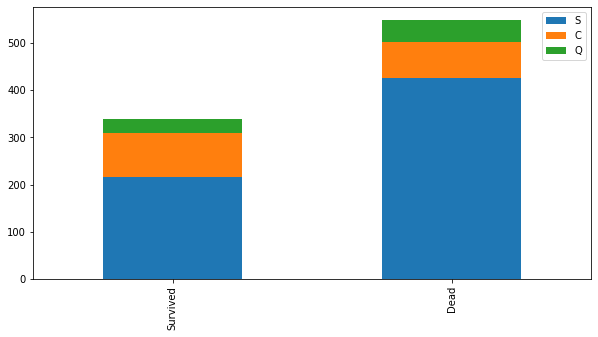

In [12]:
bar_chart('Embarked')
# People who boarded from S-embarked have more survival rate.

In [13]:
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

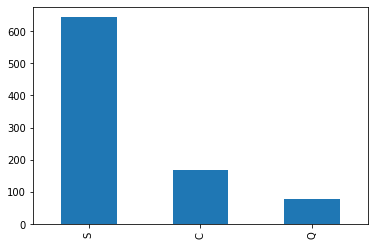

In [14]:
train_dataset['Embarked'].value_counts().plot.bar()

In [15]:
# Embarked field has 2 missing values that can be filled with the maximum of all,i.e, S.
train_dataset['Embarked'].fillna('S', inplace=True)

<AxesSubplot:ylabel='Frequency'>

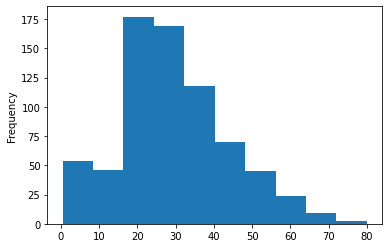

In [16]:
train_dataset['Age'].plot.hist()

In [17]:
train_dataset['Age'].mean()

29.69911764705882

In [18]:
# filling the NA values of Age with mean of the column
train_dataset['Age'].fillna(train_dataset['Age'].mean(), inplace=True)

In [19]:
train_dataset['Cabin'].fillna('NA', inplace=True)

In [20]:
train_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Cleaning dataset

In [21]:
train_dataset['Family'] = train_dataset['SibSp'] + train_dataset['Parch']
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0


In [22]:
train_dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

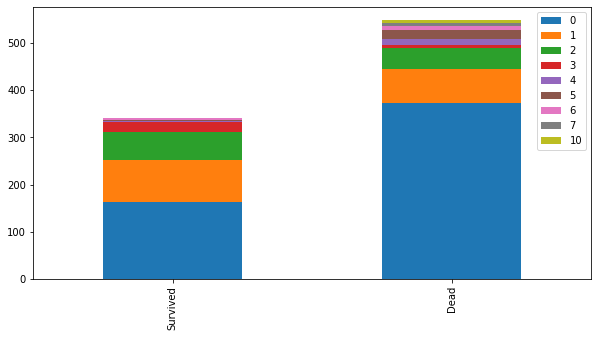

In [23]:
bar_chart('Family')
# The people travelling alone has more survival rate.

In [24]:
#categorizing the people according to their ages.
bins=[0,18,60,80]
group=['children','Adult','Old']
train_dataset['Type']=pd.cut(train_dataset['Age'],bins,labels=group)

In [25]:
# More than 70% of cabin column is missing. It will have less affect on the decision.
train_dataset.drop(['Name', 'Ticket', 'Cabin', 'Age'], axis=1, inplace=True)

Relationships b/w variables

<AxesSubplot:>

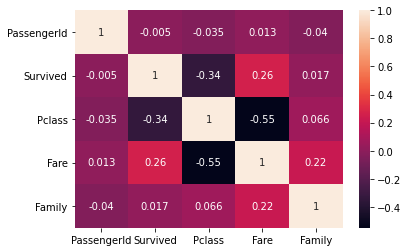

In [26]:
corr = train_dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Checking for outliers

<AxesSubplot:>

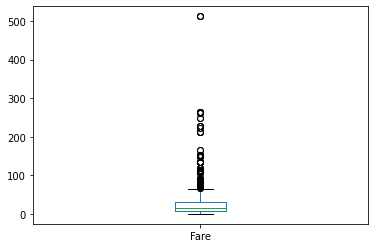

In [27]:
train_dataset['Fare'].plot.box()

In [28]:
train_dataset = train_dataset[train_dataset.Fare<=300]

Creating dummy variables for categorical data

In [29]:
selected_features = ['Sex', 'Pclass', 'Embarked', 'Type']
train_dummy = pd.get_dummies(train_dataset[selected_features])

In [30]:
train_data = train_dataset.drop(['Sex', 'Pclass', 'Embarked', 'Type'], axis=1)
train_data = train_data.join(train_dummy)

In [31]:
train_data.head()

,PassengerId,Survived,Fare,Family,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Type_children,Type_Adult,Type_Old
0,1,0,7.2500,1,3,0,1,0,0,1,0,1,0
1,2,1,71.2833,1,1,1,0,1,0,0,0,1,0
2,3,1,7.9250,0,3,1,0,0,0,1,0,1,0
3,4,1,53.1000,1,1,1,0,0,0,1,0,1,0
4,5,0,8.0500,0,3,0,1,0,0,1,0,1,0


In [32]:
Y = train_data['Survived']
X = train_data.drop(['Survived'], axis=1)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)

Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

/home/smita/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
pred = clf.predict(x_val)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, pred))

0.7865168539325843


RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [38]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
pred_rfc = rfc.predict(x_val)

In [40]:
print(accuracy_score(y_val, pred_rfc))

0.8146067415730337


In [41]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Cabin'].fillna('NA', inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [43]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S


In [44]:
test_data['Family'] = test_data['SibSp'] + test_data['Parch']
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [46]:
bins=[0,18,60,80]
group=['children','Adult','Old']
test_data['Type']=pd.cut(test_data['Age'],bins,labels=group)

In [47]:
test_data.drop(['Name', 'Ticket', 'Cabin', 'Age'], axis=1, inplace=True)

In [49]:
test_data = test_data[test_data['Fare']<=300]

In [50]:
selected_features = ['Sex', 'Pclass', 'Embarked', 'Type']
test_dummy = pd.get_dummies(test_data[selected_features])

In [51]:
test = test_data.drop(['Sex', 'Pclass', 'Embarked', 'Type'], axis=1)
test = test.join(test_dummy)

In [52]:
test.isnull().sum()

PassengerId      0
Fare             0
Family           0
Pclass           0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Type_children    0
Type_Adult       0
Type_Old         0
dtype: int64

In [53]:
y = rfc.predict(test)

In [58]:
sub = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y})

In [59]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [61]:
sub.to_csv('submission.csv')